![Alt text](https://www.eaemadrid.com/sites/eae.mad/themes/custom/unie_es/logo.webp "a title")
# Machine Learning Course - Assigment 2

**Students:** Joan Gomà Rufat, Héctor Villalba Ordóñez

***http://kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset?resource=download***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### EDA

In [3]:
df = pd.read_csv('assigment_2/UCI_Credit_Card.csv//UCI_credit_card.csv')

***veo que tengo todas las features en formato numérico y ninguna en categórico.***

In [4]:
display(df)
print(df.info())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

***vamos a ver si hay outliars***

In [5]:
describe = df.describe().T
print(describe['min'])

ID                                 1.0
LIMIT_BAL                      10000.0
SEX                                1.0
EDUCATION                          0.0
MARRIAGE                           0.0
AGE                               21.0
PAY_0                             -2.0
PAY_2                             -2.0
PAY_3                             -2.0
PAY_4                             -2.0
PAY_5                             -2.0
PAY_6                             -2.0
BILL_AMT1                    -165580.0
BILL_AMT2                     -69777.0
BILL_AMT3                    -157264.0
BILL_AMT4                    -170000.0
BILL_AMT5                     -81334.0
BILL_AMT6                    -339603.0
PAY_AMT1                           0.0
PAY_AMT2                           0.0
PAY_AMT3                           0.0
PAY_AMT4                           0.0
PAY_AMT5                           0.0
PAY_AMT6                           0.0
default.payment.next.month         0.0
Name: min, dtype: float64

No entiendo porqué hay un -2 en las columnas de Pay_n. Se supone que el valor mínimo descrito en kaggle es -1 (Pago al día). También veo que hay negativos en Bills. Luego tratamos estos valores anómalos.

In [6]:
print(describe['max'])

ID                              30000.0
LIMIT_BAL                     1000000.0
SEX                                 2.0
EDUCATION                           6.0
MARRIAGE                            3.0
AGE                                79.0
PAY_0                               8.0
PAY_2                               8.0
PAY_3                               8.0
PAY_4                               8.0
PAY_5                               8.0
PAY_6                               8.0
BILL_AMT1                      964511.0
BILL_AMT2                      983931.0
BILL_AMT3                     1664089.0
BILL_AMT4                      891586.0
BILL_AMT5                      927171.0
BILL_AMT6                      961664.0
PAY_AMT1                       873552.0
PAY_AMT2                      1684259.0
PAY_AMT3                       896040.0
PAY_AMT4                       621000.0
PAY_AMT5                       426529.0
PAY_AMT6                       528666.0
default.payment.next.month          1.0


***Vamos a ver si hay algún valor nulo en alguna columna***

In [7]:
def missing_values(data):
    missing = data.isnull().sum()
    missing = missing[missing > 0]
    if missing.empty:
        print("No hay valores nulos en el dataset.")
    else:
        print("Valores nulos:")
        print(missing)

missing_values(df)

No hay valores nulos en el dataset.


***Ahora toca plotear para ver distribuciones.***

C:\Users\hector\AppData\Local\Temp\ipykernel_23324\4079975839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default.payment.next.month', data=df, palette='coolwarm')


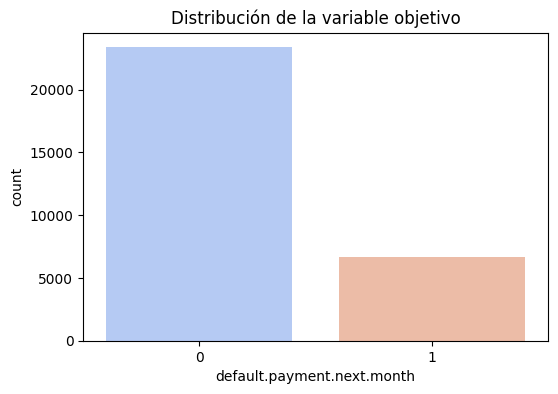

In [8]:
#Variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='default.payment.next.month', data=df, palette='coolwarm')
plt.title('Distribución de la variable objetivo')
plt.show()

Hay muchos más 0 que 1. Es unn dataset desbalanceado.

C:\Users\hector\AppData\Local\Temp\ipykernel_23324\266282886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


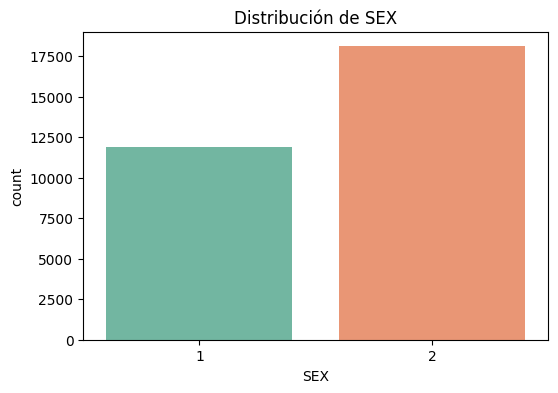

C:\Users\hector\AppData\Local\Temp\ipykernel_23324\266282886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


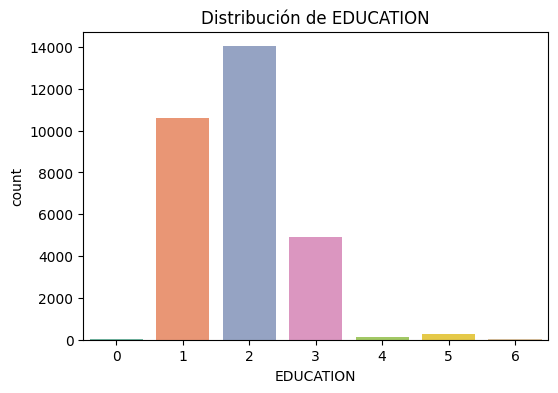

C:\Users\hector\AppData\Local\Temp\ipykernel_23324\266282886.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


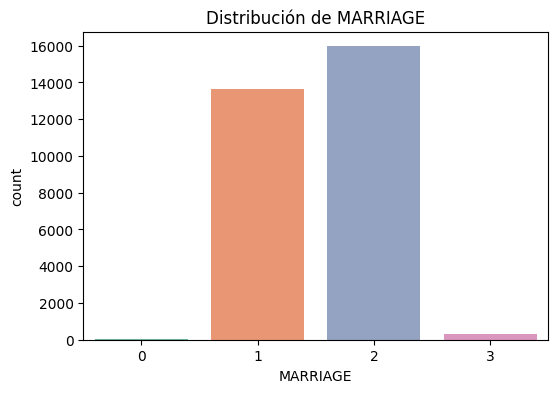

In [9]:
#Vamos a ver las distribuciones de las features categóricas que ya nos vienen dadas como numéricas
def plot_categorical(data, column):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=data, palette='Set2')
    plt.title(f'Distribución de {column}')
    plt.show()

categorical_vars = ['SEX', 'EDUCATION', 'MARRIAGE']
for col in categorical_vars:
    plot_categorical(df, col)

***Quiero ver las correlaciones de todas las features***

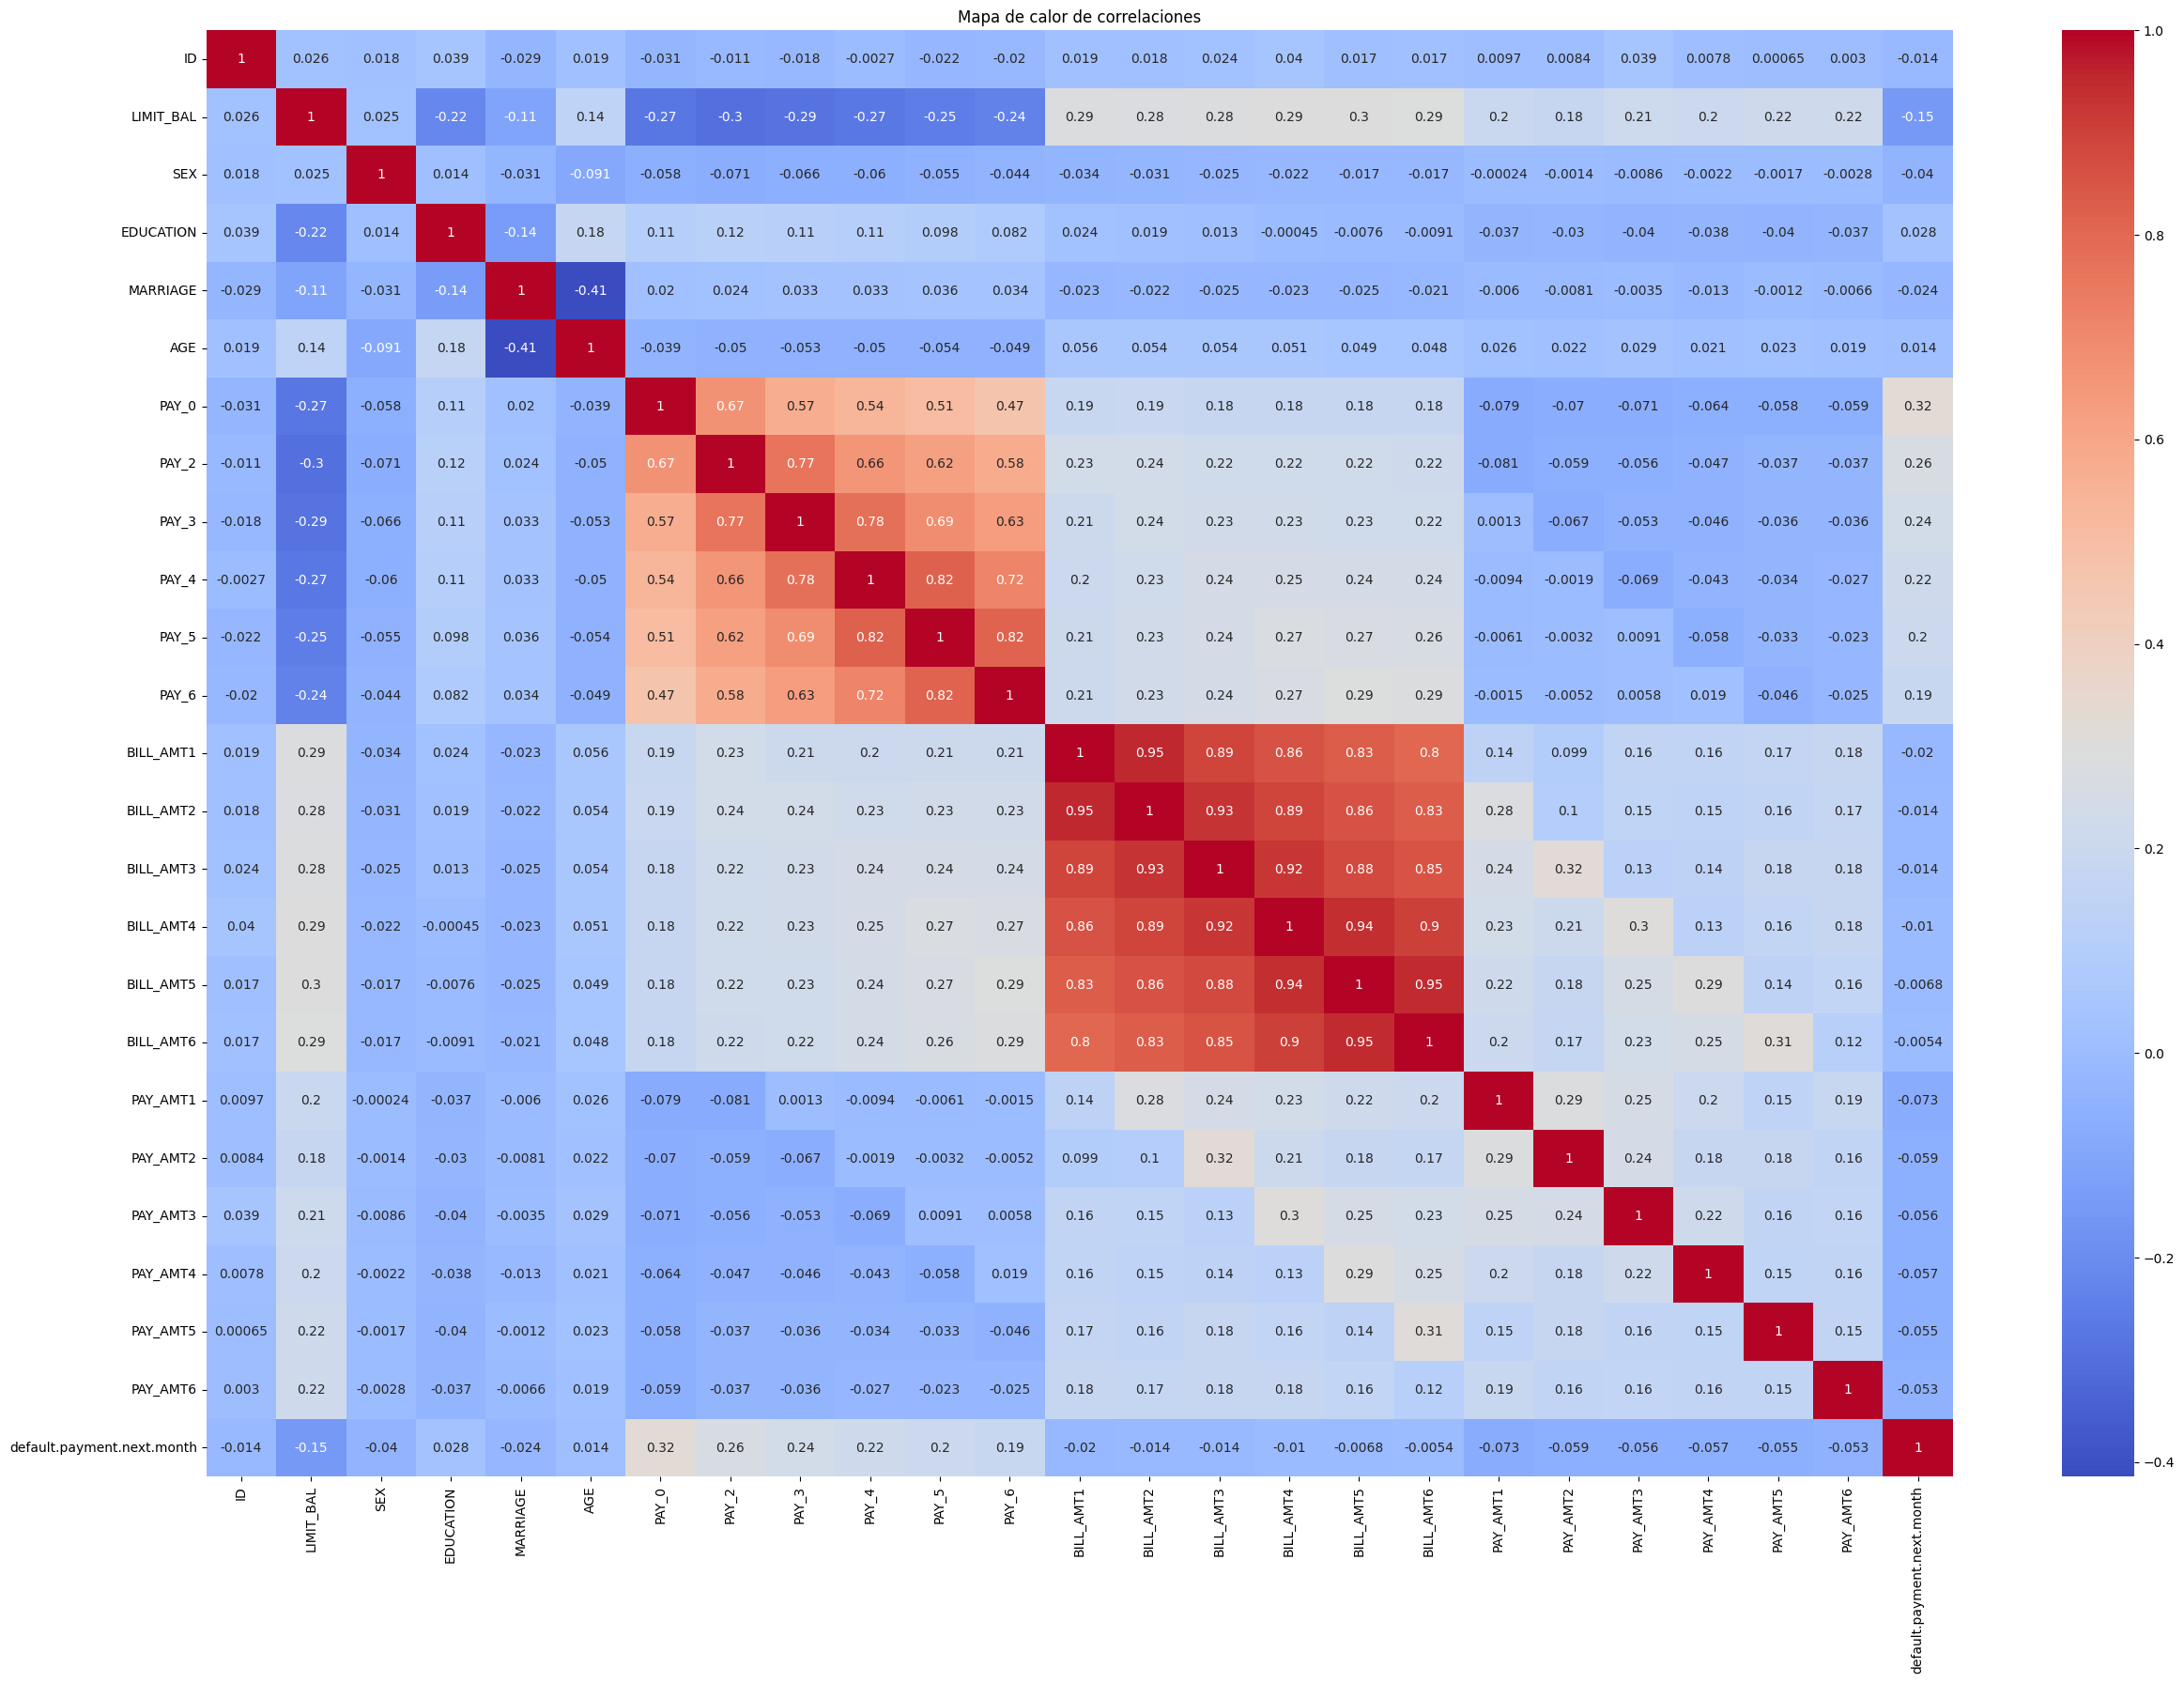

In [16]:

plt.figure(figsize=(30, 20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


Lo que veo a primera vista es que la variable Y (Default payment) tiene ligera correlación con Pay_0, Pay_1, etc... Va perdiendo fuerza a medida que la información de impago es más lejana. Pay_0 es el mes más reciente y suele tener la mayor influencia en el incumplimiento del mes siguiente. Sin embargo, es importante analizar también los meses anteriores (PAY_2 a PAY_6) para ver si hay patrones en los retrasos previos que también influyen en el default.

Además, si me fijo en Pay_0, también veo que tiene una pequeña correlación con el nivel de educación. El matrimonio y la edad parecen tener también una ligera correlación. (Son tonalidades de azul mucho más claras que por ejemplo el sexo).

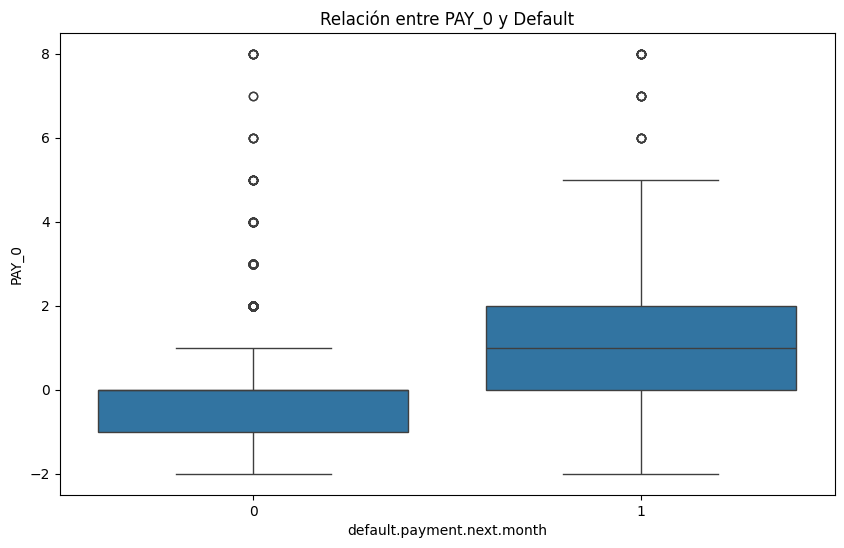

In [ ]:
#Relación entre Pay_0 y default
plt.figure(figsize=(10, 6))
sns.boxplot(x='default.payment.next.month', y='PAY_0', data=df)
plt.title('Relación entre PAY_0 y Default')
plt.show()

C:\Users\hector\AppData\Local\Temp\ipykernel_30588\3129371059.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='default.payment.next.month', data=df, ci=None, palette='coolwarm')
C:\Users\hector\AppData\Local\Temp\ipykernel_30588\3129371059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='default.payment.next.month', data=df, ci=None, palette='coolwarm')
C:\Users\hector\AppData\Local\Temp\ipykernel_30588\3129371059.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='default.payment.next.month', data=df, ci=None, palette='coolwarm')
C:\Users\hector\AppData\Local\Temp\ipykernel_30588\3129371059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

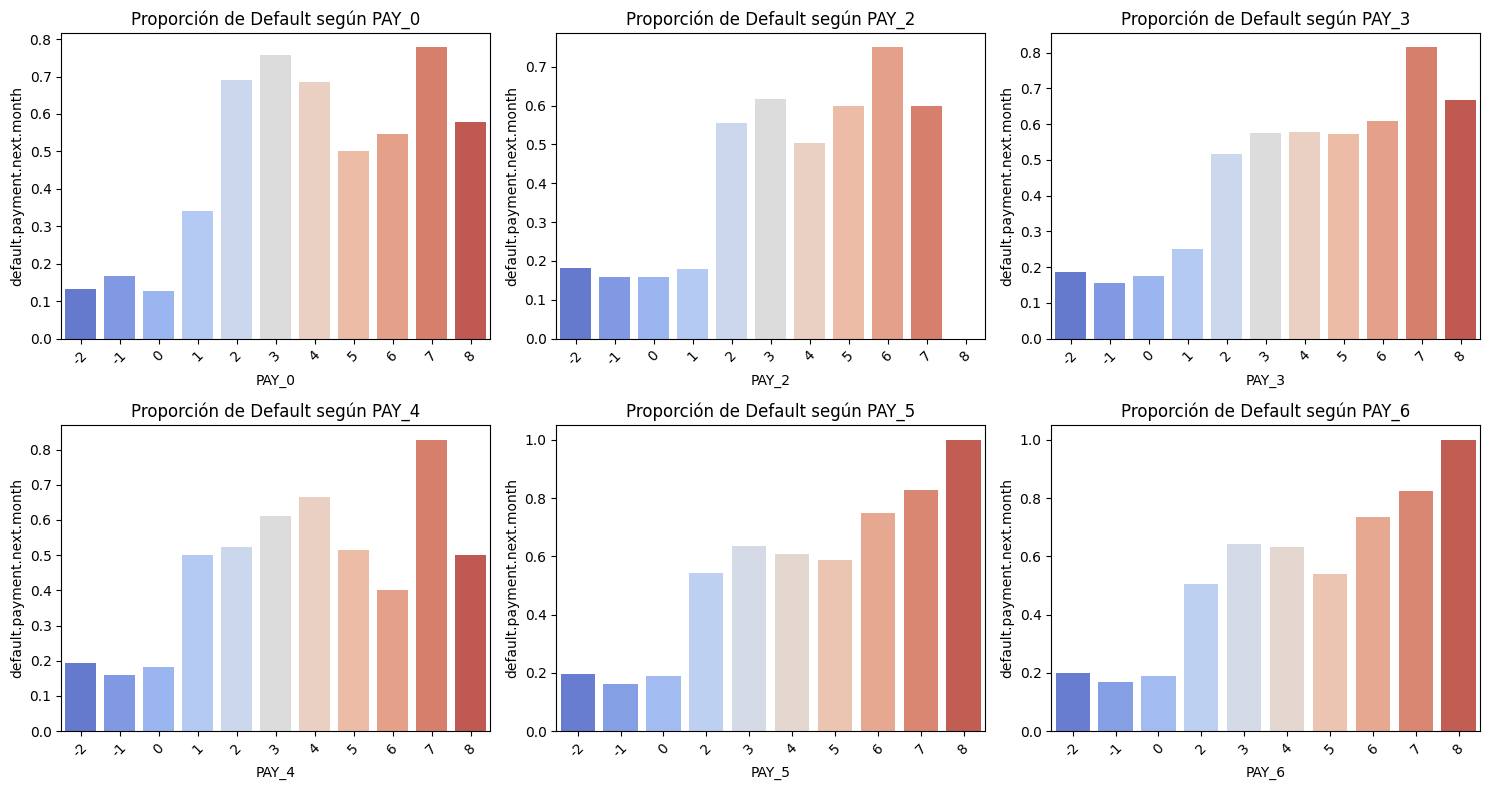

In [21]:
#Relación entre retrasos en pago y default con gráficos de barras
plt.figure(figsize=(15, 8))
for i, col in enumerate(pay_columns, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=col, y='default.payment.next.month', data=df, ci=None, palette='coolwarm')
    plt.title(f'Proporción de Default según {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hay cosas que no me cuadran.

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above.

Sin embargo, podemos observar que hay -2 y 0, que no tienen categoría para nosotros. Igualmente, se puede ver que no suelen hacer default.

De todas formas, se puede apreciar que ***a medida que aumentan los meses de impago, la probabilidad de default es más alta***. El modelo debe encontrar la combinación ideal para prever el default.

***Vamos a ver la relación de eduación, matrimonio y edad con impago***

C:\Users\hector\AppData\Local\Temp\ipykernel_30588\2807319051.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='default.payment.next.month', data=df, ci=None, palette='coolwarm')
C:\Users\hector\AppData\Local\Temp\ipykernel_30588\2807319051.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='default.payment.next.month', data=df, ci=None, palette='coolwarm')
C:\Users\hector\AppData\Local\Temp\ipykernel_30588\2807319051.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='default.payment.next.month', data=df, ci=None, palette='coolwarm')
C:\Users\hector\AppData\Local\Temp\ipykernel_30588\2807319051.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be r

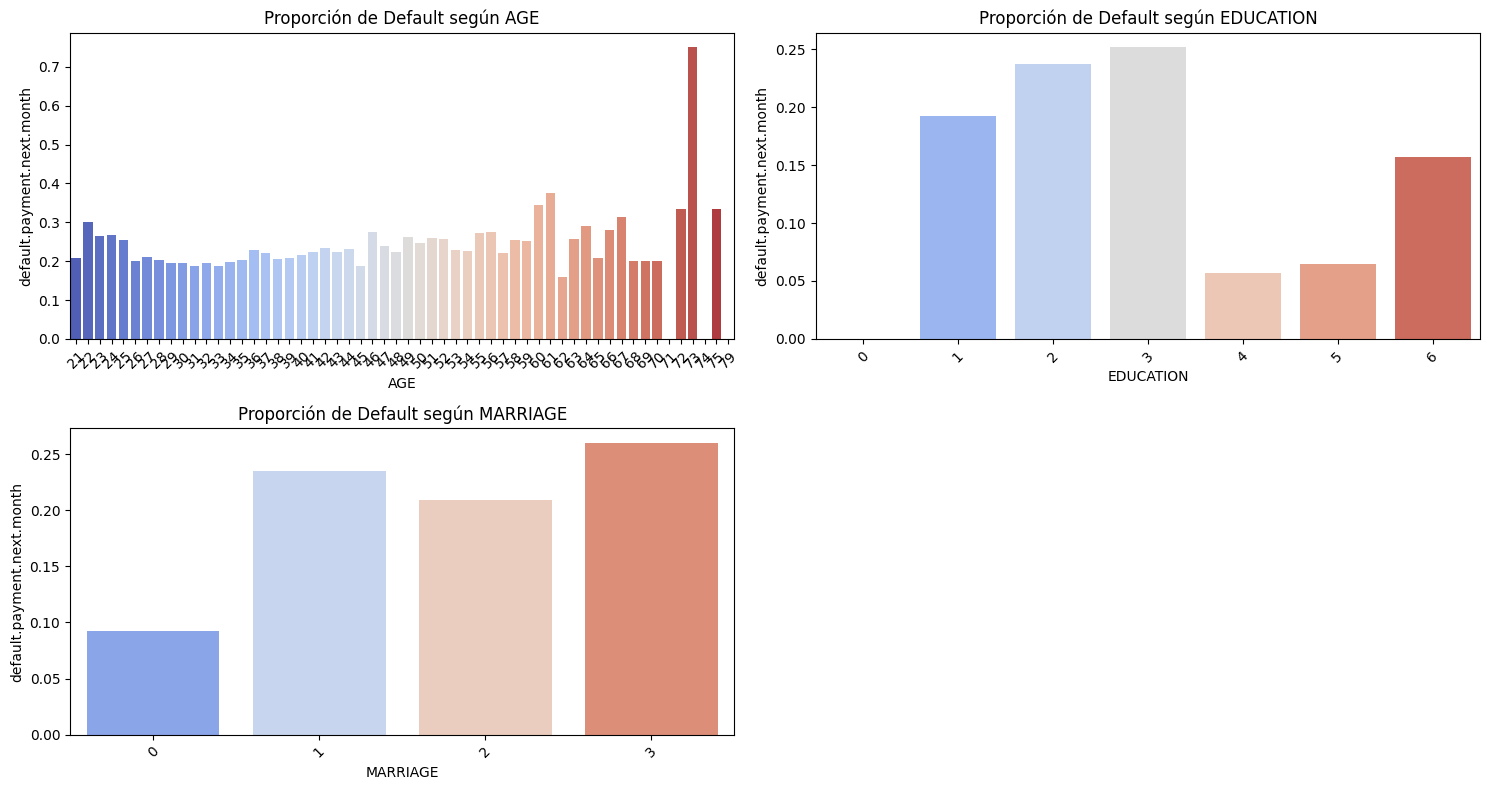

In [33]:
#Relación entre retrasos en pago y default con gráficos de barras
plt.figure(figsize=(15, 8))
columns = ['AGE', 'EDUCATION', 'MARRIAGE']
for i,col in enumerate(columns,1):
    plt.subplot(2, 2, i)
    sns.barplot(x=col, y='default.payment.next.month', data=df, ci=None, palette='coolwarm')
    plt.title(f'Proporción de Default según {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()